# Import packages and verify versions

In [1]:
import pandas as pd
import sklearn
print('The pandas version is {}.'.format(pd.__version__))
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The pandas version is 0.24.1.
The scikit-learn version is 0.20.3.


# Load data

### Insert credentials for customer.csv

This is typically a hidden cell for the purposes of sharing the notebook.

In [2]:
# @hidden_cell
# The following code contains the credentials for a file in your IBM Cloud Object Storage.
# You might want to remove those credentials before you share your notebook.
credentials_1 = {
    'IAM_SERVICE_ID': 'iam-ServiceId-210be2d3-af5e-43b6-9d74-0427ae8ae81a',
    'IBM_API_KEY_ID': '9FthwkkdExB6wrCH1HafvISYEZEeKAKEKpWfPg9TV2hM',
    'ENDPOINT': 'https://s3-api.us-geo.objectstorage.service.networklayer.com',
    'IBM_AUTH_ENDPOINT': 'https://iam.bluemix.net/oidc/token',
    'BUCKET': 'pyrlabtest-donotdelete-pr-ecn1gj2kpu5dli',
    'FILE': 'customers.csv'
}


### Insert credentials for transactions.csv

This is typically a hidden cell for the purposes of sharing the notebook.

In [3]:
# @hidden_cell
# The following code contains the credentials for a file in your IBM Cloud Object Storage.
# You might want to remove those credentials before you share your notebook.
credentials_2 = {
    'IAM_SERVICE_ID': 'iam-ServiceId-210be2d3-af5e-43b6-9d74-0427ae8ae81a',
    'IBM_API_KEY_ID': '9FthwkkdExB6wrCH1HafvISYEZEeKAKEKpWfPg9TV2hM',
    'ENDPOINT': 'https://s3-api.us-geo.objectstorage.service.networklayer.com',
    'IBM_AUTH_ENDPOINT': 'https://iam.bluemix.net/oidc/token',
    'BUCKET': 'pyrlabtest-donotdelete-pr-ecn1gj2kpu5dli',
    'FILE': 'transactions.csv'
}


### Import necessary IBM CoS libraries and insert customers.csv into the data frame.

This can be accomplished within Watson Studio on the right hand menu, find the applicable file and chose Pandas Data Frame

*Default is to insert into a data frame named df_data_1. When using a templated notebook, make sure that the cells below reference the correct data frame name OR change this cell to name the data frame in the same name used below*

In [4]:
import types
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0;

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_b6ce1d66a23747c685affa13595b2acb = ibm_boto3.client(service_name ='s3',
    ibm_api_key_id='9FthwkkdExB6wrCH1HafvISYEZEeKAKEKpWfPg9TV2hM',
    ibm_auth_endpoint="https://iam.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_b6ce1d66a23747c685affa13595b2acb.get_object(Bucket='pyrlabtest-donotdelete-pr-ecn1gj2kpu5dli',Key='customers.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

customers = pd.read_csv(body)
customers.head()



,CustomerID,Retire,Invest,Educ,Mortgage,LOC,GENDER,MARITAL,CHILDREN,WORKING,HighMonVal,AgeRange
0,787,0.0,No,No,No,No,Male,Single,No,Yes,No,17 to 22
1,789,0.0,No,No,No,No,Male,Single,No,Yes,No,17 to 22
2,1,NaN,No,No,Yes,No,Female,Widowed,No,Yes,Yes,17 to 22
3,2,NaN,No,Yes,No,No,Female,Separated,No,Yes,Yes,17 to 22
4,3,1.0,No,Yes,Yes,No,Male,Single,No,Yes,No,17 to 22


In [5]:
pd.set_option('display.max_columns', None)
customers.head()

,CustomerID,Retire,Invest,Educ,Mortgage,LOC,GENDER,MARITAL,CHILDREN,WORKING,HighMonVal,AgeRange
0,787,0.0,No,No,No,No,Male,Single,No,Yes,No,17 to 22
1,789,0.0,No,No,No,No,Male,Single,No,Yes,No,17 to 22
2,1,NaN,No,No,Yes,No,Female,Widowed,No,Yes,Yes,17 to 22
3,2,NaN,No,Yes,No,No,Female,Separated,No,Yes,Yes,17 to 22
4,3,1.0,No,Yes,Yes,No,Male,Single,No,Yes,No,17 to 22


### Insert the transactions.csv into a data frame

The same note regarding the default data frame name applies here. The libraries do not need to be re-imported (though the insert to code from the right hand menu may still add the import statement.)

In [6]:
body = client_b6ce1d66a23747c685affa13595b2acb.get_object(Bucket='pyrlabtest-donotdelete-pr-ecn1gj2kpu5dli',Key='transactions.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

transactions = pd.read_csv(body)
transactions.head()

,CustomerID,TimeYears,lasttrans,current,Frequency_score,Monetary_score,Churn
0,787,7,117.393407,1,1,55541,T
1,789,7,117.393407,1,six,1,T
2,1,6,137.165304,1,2,2,F
3,2,8,72.997904,1,1,3,F
4,3,13,105.156650,1,2,3,F


### Print the number of rows for the customer data frame & transaction data frame
This is to confirm that the two data frames will join (same # of rows)
(hint: use the same key column to ensure the same number of rows)

In [7]:
print('Number of rows in customers = {}'.format(customers.CustomerID.count()))
print('Number of rows in trips = {}'.format(transactions.CustomerID.count()))

Number of rows in customers = 788
Number of rows in trips = 788


# Join Data

Join the Customer and Transaction Data Frames together. Identify which key should be used and the type of join (inner, outer) to be used. *Do not forget to drop the index*

In [8]:
joined = customers.join(transactions.set_index('CustomerID'), on='CustomerID', how='inner').reset_index(drop=True)

Display the number of rows joined and examine the newly joined data set. 
*Number of rows joined should be 788*

In [9]:
print('Number of rows in joined = {}'.format(joined.CustomerID.count()))
joined.head()

Number of rows in joined = 788


,CustomerID,Retire,Invest,Educ,Mortgage,LOC,GENDER,MARITAL,CHILDREN,WORKING,HighMonVal,AgeRange,TimeYears,lasttrans,current,Frequency_score,Monetary_score,Churn
0,787,0.0,No,No,No,No,Male,Single,No,Yes,No,17 to 22,7,117.393407,1,1,55541,T
1,789,0.0,No,No,No,No,Male,Single,No,Yes,No,17 to 22,7,117.393407,1,six,1,T
2,1,NaN,No,No,Yes,No,Female,Widowed,No,Yes,Yes,17 to 22,6,137.165304,1,2,2,F
3,2,NaN,No,Yes,No,No,Female,Separated,No,Yes,Yes,17 to 22,8,72.997904,1,1,3,F
4,3,1.0,No,Yes,Yes,No,Male,Single,No,Yes,No,17 to 22,13,105.156650,1,2,3,F


# Analyze Data

Look for column outliers or other quality issues, such as data type, that will affect the end model

*Should be clear to see that one of the columns contains data outliers*

In [10]:
joined.describe()
#Clear to see that the Monetary_score column contains data outliers

,CustomerID,Retire,TimeYears,lasttrans,current,Monetary_score
count,788.000000,786.000000,788.000000,788.000000,788.0,788.000000
mean,394.501269,0.489822,8.383249,99.768204,1.0,73.489848
std,227.622497,0.500215,2.945127,28.537232,0.0,1978.459460
min,1.000000,0.000000,0.000000,21.604358,1.0,1.000000
25%,197.750000,0.000000,6.000000,79.443208,1.0,2.000000
50%,394.500000,0.000000,8.000000,99.772848,1.0,3.000000
75%,591.250000,1.000000,10.000000,118.688207,1.0,4.000000
max,789.000000,1.000000,16.000000,201.579985,1.0,55541.000000


### Check your data frame's data types

Are the types correct? You can either check the entire data frame, or specific columns that may have been identified from the df.head() command ran earlier following the join

In [11]:
# CHecking the entire data frame data types
joined.dtypes

CustomerID           int64
Retire             float64
Invest              object
Educ                object
Mortgage            object
LOC                 object
GENDER              object
MARITAL             object
CHILDREN            object
WORKING             object
HighMonVal          object
AgeRange            object
TimeYears            int64
lasttrans          float64
current              int64
Frequency_score     object
Monetary_score       int64
Churn               object
dtype: object

In [12]:
# The Frequency_score column should have been inferred as a numeric, so it may contain some unwanted non-numeric data
joined.dtypes.filter(items=['Frequency_score'])

Frequency_score    object
dtype: object

# Data Cleansing

### Let's start with dropping rows that have invalid data

We do this so that we don't use resources cleansing rows that we will ultimately discard due to invalid data

*We may also want to save the rows with invalid data for correction and then re adding them. For the purpose of this lab, the data will just be dropped*

Show rows with invalid data

In [20]:
# Show rows with invalid data
print('Number of rows with invalid values = {}'.format(len(joined[joined.isnull().any(axis=1)])))
joined[joined.isnull().any(axis=1)]

Number of rows with invalid values = 1


,CustomerID,Retire,Invest,Educ,Mortgage,LOC,GENDER,MARITAL,CHILDREN,WORKING,HighMonVal,AgeRange,TimeYears,lasttrans,current,Frequency_score,Monetary_score,Churn
1,789,0.0,No,No,No,No,Male,Single,No,Yes,No,17 to 22,7,117.393407,1,NaN,1,T


Drop the rows with invalid data

Display the remaining number of rows in the data set. *Should be 761*

In [21]:
#Drop rows with invalid data
joined = joined.dropna(axis=0)
print('Number of rows in joined = {}'.format(joined.CustomerID.count()))

Number of rows in joined = 761


### Now we want to correct the data type of the column identified above.

Convert String Data to Numeric data using the .to_numeric function of pandas.

In [22]:
# Force the Frequency_score column to a numeric data type as it should be
joined[['Frequency_score']] = joined[['Frequency_score']].apply(pd.to_numeric, errors='coerce')

### Check the new data type of the column we changed 

We want to make sure that the new data type is inline with similar columns

In [23]:
#Frequency_score is float data type, but should be integer
joined.dtypes.filter(items=['Frequency_score'])

Frequency_score    float64
dtype: object

### Cast the column to the correct data type 
*hint - should be the same dat type as a similarly named column*

In [24]:
# Cast Frequency_score as integer
joined[['Frequency_score']] = joined[['Frequency_score']].astype(int)
joined.dtypes.filter(items=['Frequency_score'])

Frequency_score    int64
dtype: object

### Now we want to remove the outliers from the column identified above in the .decribe() command
we can see that 75% of the rows fall within the 1-4 number range. We want to capture as much of the data as applicable, so let's drop any rows that are less than 5

In [25]:
# Remove the rows with outliers in Monetary_score that we previously identified
joined = joined[joined['Monetary_score'] <=5]

### Let's spot check the new data frame and the specific column we removed the outliers from

In [26]:
joined.head()

,CustomerID,Retire,Invest,Educ,Mortgage,LOC,GENDER,MARITAL,CHILDREN,WORKING,HighMonVal,AgeRange,TimeYears,lasttrans,current,Frequency_score,Monetary_score,Churn
4,3,1.0,No,Yes,Yes,No,Male,Single,No,Yes,No,17 to 22,13,105.156650,1,2,3,F
5,4,1.0,No,No,No,No,Female,Widowed,No,Yes,Yes,17 to 22,7,75.530619,1,2,3,F
6,5,1.0,No,No,No,No,Female,Separated,No,Yes,No,17 to 22,13,86.580787,1,1,5,F
7,6,1.0,No,No,Yes,Yes,Male,Single,No,No,No,17 to 22,11,122.074913,1,3,4,F
8,7,1.0,No,No,No,No,Female,Single,No,No,Yes,17 to 22,8,128.547682,1,1,5,F


In [27]:
joined['Monetary_score'].describe()

count    760.000000
mean       3.026316
std        1.396152
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: Monetary_score, dtype: float64

# Now lets drop columns not being used as features
*The columns not being used are CustomerID, Invest, Educ, MARTIAL, TimeYears, Lasttrans, current, Monetary_score*

Once dropped, we will want to check the new data frame

In [28]:
dropCols = (['CustomerID', 'Invest', 'Educ', 'MARITAL', 'TimeYears', 'lasttrans', 'current', 'Monetary_score'])
joined.drop(dropCols, axis=1, inplace=True)
joined.head()

,Retire,Mortgage,LOC,GENDER,CHILDREN,WORKING,HighMonVal,AgeRange,Frequency_score,Churn
4,1.0,Yes,No,Male,No,Yes,No,17 to 22,2,F
5,1.0,No,No,Female,No,Yes,Yes,17 to 22,2,F
6,1.0,No,No,Female,No,Yes,No,17 to 22,1,F
7,1.0,Yes,Yes,Male,No,No,No,17 to 22,3,F
8,1.0,No,No,Female,No,No,Yes,17 to 22,1,F


# Convert numeric data to integer (some numeric columns were inferred as float64)
First, lets check the data type of the column(s).

In [29]:
# Retire column was infered as a float data type
joined['Retire'].dtypes

dtype('float64')

Let's create a list of column names based on numeric data types (*hint float64 & int64). We also want to create a list of the correct data type to correspond with the list of column names

In [30]:
joinedColNames = joined.columns.values.tolist()
intList = []
numericCols = []
for col in joinedColNames:
    if joined[col].dtypes == 'float64' or joined[col].dtypes == 'int64':
        numericCols.append(col)
        intList.append('int')
print(numericCols)
print(intList)

['Retire', 'Frequency_score']
['int', 'int']


Create a dictionary that will be used to set the numeric columns to integer type & Print the dictionary

In [31]:
intDict = dict(zip(numericCols, intList))
print("Show columns of integer data type")
intDict

Show columns of integer data type


{'Retire': 'int', 'Frequency_score': 'int'}

Convert the numeric columns to integer

In [32]:
# Convert the numeric columns to integer
joined = joined.astype(intDict)

Check the data types to insure all numeric data is int64

In [33]:
# All numeric data is now int64
joined.dtypes

Retire              int64
Mortgage           object
LOC                object
GENDER             object
CHILDREN           object
WORKING            object
HighMonVal         object
AgeRange           object
Frequency_score     int64
Churn              object
dtype: object

# Encode the string data

In [34]:
#install sklearn-pandas package that will be used to encode the categorical features
!pip install sklearn-pandas
from sklearn.preprocessing import LabelEncoder
from sklearn_pandas import DataFrameMapper

Encode the Churn label calling the new column CHURN and drop the original Churn column

In [35]:
#Encode the Churn label calling the new column CHURN and drop the original Churn column
le = LabelEncoder()
joined['CHURN']= le.fit_transform(joined['Churn'])
joined = joined.drop(['Churn'], axis = 1)
joined.head()

,Retire,Mortgage,LOC,GENDER,CHILDREN,WORKING,HighMonVal,AgeRange,Frequency_score,CHURN
4,1,Yes,No,Male,No,Yes,No,17 to 22,2,0
5,1,No,No,Female,No,Yes,Yes,17 to 22,2,0
6,1,No,No,Female,No,Yes,No,17 to 22,1,0
7,1,Yes,Yes,Male,No,No,No,17 to 22,3,0
8,1,No,No,Female,No,No,Yes,17 to 22,1,0


Apply the LabelEncoder to encode the categorical features

In [36]:
# Apply the LabelEncoder to encode the categorical features

mapper = DataFrameMapper(
    [('Retire', None),
     ('Mortgage', LabelEncoder()),
     ('LOC', LabelEncoder()),
     ('GENDER', LabelEncoder()),
     ('CHILDREN',LabelEncoder()),
     ('WORKING', LabelEncoder()),
     ('HighMonVal',LabelEncoder()),
     ('AgeRange',LabelEncoder()),
     ('Frequency_score',None)
    ])

# Prepare the data for machine learning

1. Split the label column out from the features dataframe
2. Sample the indexed DataFrame
3. Create a separate DataFrame from the label column and sample

In [37]:
# Split the label column out from the features dataframe
X = joined.drop('CHURN', axis = 1)
y = joined['CHURN']
# Sample the indexed DataFrame
X.sample(n=5, random_state=2)

,Retire,Mortgage,LOC,GENDER,CHILDREN,WORKING,HighMonVal,AgeRange,Frequency_score
266,0,No,Yes,Male,Yes,No,No,23 to 30,5
365,1,Yes,Yes,Female,No,Yes,Yes,17 to 22,3
673,0,No,No,Male,No,Yes,No,23 to 30,1
318,1,Yes,Yes,Female,No,Yes,Yes,31 to 40,2
73,1,No,Yes,Female,No,Yes,Yes,23 to 30,4


In [38]:
y.to_frame().sample(n=5, random_state=10)

,CHURN
390,1
243,1
180,1
766,0
47,0


# Create training and test datasets¶

Split X and y Data Frames into training and testing sets - accomplished by importing test_train_split from the sklearn.model_selection library (code already included)

In [39]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
X_test.head(5)

,Retire,Mortgage,LOC,GENDER,CHILDREN,WORKING,HighMonVal,AgeRange,Frequency_score
774,0,No,No,Male,No,No,No,17 to 22,3
594,0,No,No,Male,No,Yes,No,17 to 22,3
586,1,Yes,No,Male,Yes,Yes,Yes,23 to 30,3
44,1,No,No,Female,No,Yes,No,17 to 22,4
251,0,No,Yes,Male,Yes,No,No,60 to 70,4


Show the number of rows in each data set

In [40]:
# Show the number of rows in each data set
print('Number of rows in X_train is {}.'.format(X_train.shape[0]))
print('Number of rows in X_test is {}.'.format(X_test.shape[0]))
print('Number of rows in y_train is {}.'.format(y_train.shape[0]))
print('Number of rows in y_test is {}.'.format(y_test.shape[0]))

Number of rows in X_train is 684.
Number of rows in X_test is 76.
Number of rows in y_train is 684.
Number of rows in y_test is 76.


# Train the model

The eval_metric parameter specifies the evaluation metrics for validation data
We will be using a Binary classification error rate. It is calculated as # of wrong cases divided by # of all cases. *(#wrong/#all)*
For the predicitons, the evaluation will regard the instances with prediction value larger than 0.5 as positive instances and
the others as negative instances. 

In [41]:
import sklearn.pipeline
from xgboost import XGBClassifier

XGBClassifier = XGBClassifier()
steps = [('mapper', mapper),('XGBClassifier', XGBClassifier)]
pipeline = sklearn.pipeline.Pipeline(steps)
#model=pipeline.fit( X_train, y_train )

#Train the model
model = (pipeline.fit(X_train, y_train, XGBClassifier__eval_metric='error', 
        XGBClassifier__eval_set=[((mapper.fit_transform(X_train), y_train)),(mapper.fit_transform(X_test), y_test)]))

# The eval_metric parameter specifies the evaluation metrics for validation data 
# Here we are using a Binary classification error rate. It is calculated as #(wrong cases)/#(all cases).
# For the predictions, the evaluation will regard the instances with prediction value larger than 0.5 as positive instances,
# and the others as negative instances.

[0]	validation_0-error:0.22076	validation_1-error:0.263158
[1]	validation_0-error:0.209064	validation_1-error:0.236842
[2]	validation_0-error:0.209064	validation_1-error:0.236842
[3]	validation_0-error:0.209064	validation_1-error:0.236842
[4]	validation_0-error:0.175439	validation_1-error:0.184211
[5]	validation_0-error:0.194444	validation_1-error:0.210526
[6]	validation_0-error:0.172515	validation_1-error:0.157895
[7]	validation_0-error:0.168129	validation_1-error:0.144737
[8]	validation_0-error:0.182749	validation_1-error:0.157895
[9]	validation_0-error:0.160819	validation_1-error:0.105263
[10]	validation_0-error:0.166667	validation_1-error:0.131579
[11]	validation_0-error:0.166667	validation_1-error:0.131579
[12]	validation_0-error:0.162281	validation_1-error:0.105263
[13]	validation_0-error:0.165205	validation_1-error:0.105263
[14]	validation_0-error:0.160819	validation_1-error:0.105263
[15]	validation_0-error:0.154971	validation_1-error:0.105263
[16]	validation_0-error:0.159357	va

### Show model training parameters 

In [42]:
# Show model training parameters
model.get_params()

{'memory': None,
 'steps': [('mapper', DataFrameMapper(default=False, df_out=False,
           features=[('Retire', None), ('Mortgage', LabelEncoder()), ('LOC', LabelEncoder()), ('GENDER', LabelEncoder()), ('CHILDREN', LabelEncoder()), ('WORKING', LabelEncoder()), ('HighMonVal', LabelEncoder()), ('AgeRange', LabelEncoder()), ('Frequency_score', None)],
           input_df=False, sparse=False)),
  ('XGBClassifier',
   XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
          colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
          max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
          n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
          reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
          silent=True, subsample=1))],
 'mapper': DataFrameMapper(default=False, df_out=False,
         features=[('Retire', None), ('Mortgage', LabelEncoder()), ('LOC', LabelEncoder()), ('GENDER', LabelEncoder()

# Check model accuracy

1. import the required modules from the scikit-learn metrics package *(provided)*
2. make predictions for the test data
3. convert the numpy array provided the from the precit function to a list
4. evaluate the predictions

In [43]:
#import required modules from the scikit-learn metrics package
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [44]:
# make predictions for test data
y_pred = model.predict(X_test)
# Convert numpy array to list
predictions = y_pred.tolist()

In [45]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print('Accuracy: {:.1f}%'.format(accuracy * 100.0))

Accuracy: 86.8%


# Analyze Model - Feature Importance and Trees

In [46]:
print(XGBClassifier.feature_importances_)

[0.09169055 0.09885387 0.09455588 0.04297994 0.06160459 0.03438395
 0.13896848 0.18911175 0.247851  ]


In [47]:
[print('{0} importance = {1:.2f}'.format(X_train.columns.tolist()[x], XGBClassifier.feature_importances_[x])) for x in range(len(X_train.columns))]

Retire importance = 0.09
Mortgage importance = 0.10
LOC importance = 0.09
GENDER importance = 0.04
CHILDREN importance = 0.06
WORKING importance = 0.03
HighMonVal importance = 0.14
AgeRange importance = 0.19
Frequency_score importance = 0.25


[None, None, None, None, None, None, None, None, None]

In [48]:
from xgboost import plot_importance
plot_importance(XGBClassifier)

### Install graphviz for visual analysis & import matplotlib.pylot *(provided)* 

In [49]:
!pip install graphviz
import matplotlib.pyplot as plt
%matplotlib inline

# Investigate model

Text(0.5, 0, 'Number of iterations')

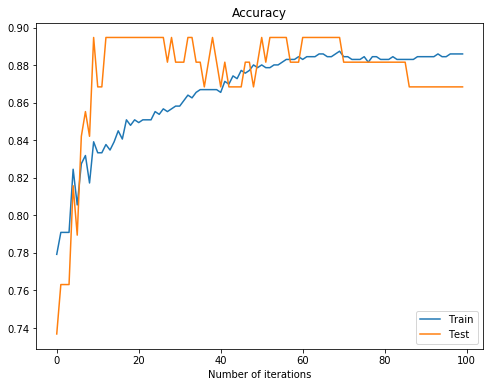

In [50]:
# Plot and display the performance evaluation
eval = model.named_steps['XGBClassifier'].evals_result()
eval_steps = range(len(eval['validation_0']['error']))

# Set the figure for matplotlib figures
fig, ax = plt.subplots(1, 1, sharex=True, figsize=(8, 6))

ax.plot(eval_steps, [1-x for x in eval['validation_0']['error']], label='Train')
ax.plot(eval_steps, [1-x for x in eval['validation_1']['error']], label='Test')
ax.legend()
ax.set_title('Accuracy')
ax.set_xlabel('Number of iterations')

# Avoid Overfitting By Limiting Number of Trees

In [51]:
# ntree_limits the number of trees in the prediction; defaults to 0 (use all trees)
n_trees = 10
y_pred = model.named_steps['XGBClassifier'].predict(mapper.fit_transform(X_test), ntree_limit= n_trees)

In [52]:
# Check the accuracy of the trained model
accuracy = accuracy_score(y_test, y_pred)

print('Accuracy: {:.1f}%'.format(accuracy * 100.0))

Accuracy: 89.5%


# Avoid Overfitting By Early Stopping

In [53]:
# Validation error needs to decrease at least every <early_stopping_rounds> round(s) to continue training
# Returns the model from the last iteration (not the best one) 
rounds = 10
steps = [('mapper', mapper),('XGBClassifier', XGBClassifier)]
pipeline = sklearn.pipeline.Pipeline(steps)
model = (pipeline.fit(X_train, y_train, XGBClassifier__eval_metric='error', XGBClassifier__early_stopping_rounds=rounds,
        XGBClassifier__eval_set=[((mapper.fit_transform(X_train), y_train)),(mapper.fit_transform(X_test), y_test)]))

[0]	validation_0-error:0.22076	validation_1-error:0.263158
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 10 rounds.
[1]	validation_0-error:0.209064	validation_1-error:0.236842
[2]	validation_0-error:0.209064	validation_1-error:0.236842
[3]	validation_0-error:0.209064	validation_1-error:0.236842
[4]	validation_0-error:0.175439	validation_1-error:0.184211
[5]	validation_0-error:0.194444	validation_1-error:0.210526
[6]	validation_0-error:0.172515	validation_1-error:0.157895
[7]	validation_0-error:0.168129	validation_1-error:0.144737
[8]	validation_0-error:0.182749	validation_1-error:0.157895
[9]	validation_0-error:0.160819	validation_1-error:0.105263
[10]	validation_0-error:0.166667	validation_1-error:0.131579
[11]	validation_0-error:0.166667	validation_1-error:0.131579
[12]	validation_0-error:0.162281	validation_1-error:0.105263
[13]	validation_0-error:0.165205	validation_1-error:0.105

In [54]:
# Show best score
print('Best Score: {:.3f}'.format(XGBClassifier.best_score))
print('Best Iteration: {}'.format(XGBClassifier.best_iteration))

Best Score: 0.105
Best Iteration: 9


In [55]:
# Show best number of trees
print('Best Score: {}'.format(XGBClassifier.best_ntree_limit))

Best Score: 10


In [56]:
# Check the accuracy of the trained model with early stopping
accuracy = accuracy_score(y_test, y_pred)

print('Accuracy: {:.1f}%.'.format(accuracy * 100.0))

Accuracy: 89.5%.


# Plot Model Performance

In [59]:
# Print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[23  3]
 [ 5 45]]


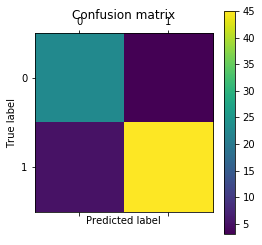

In [60]:
# Plot the confusion matrix
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

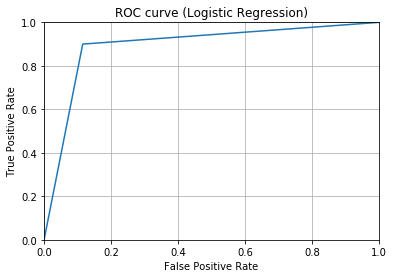

In [61]:
# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve (Logistic Regression)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

In [62]:
# Print out AUC, the percentage of the ROC plot that is underneath the curve
print('AUC using XGBoost = {:.2f}'.format(roc_auc_score(y_test, y_pred)))

AUC using XGBoost = 0.89


# Save and Deploy Model

In [63]:
#Import WML API
from watson_machine_learning_client import WatsonMachineLearningAPIClient

2020-05-18 22:53:50,846 - watson_machine_learning_client.metanames - WARNING - 'AUTHOR_EMAIL' meta prop is deprecated. It will be ignored.


In [64]:
wml_credentials={
  "apikey": "iZ0kha1IQxdAI239b92utWHTkWhPdS2JwCIGH90nOIKU",
  "iam_apikey_description": "Auto-generated for key 065ebbd2-9b64-4479-b0fe-e6c1d9054cd1",
  "iam_apikey_name": "wdp-writer",
  "iam_role_crn": "crn:v1:bluemix:public:iam::::serviceRole:Writer",
  "iam_serviceid_crn": "crn:v1:bluemix:public:iam-identity::a/d8ec35232337194375b709e39ae4e4e5::serviceid:ServiceId-5b9bf5c6-b42b-423b-a0ac-045ccb154d9e",
  "instance_id": "12199dc8-c416-4bce-b27e-f3cde36d59ac",
  "password": "296e26c3-fc25-47fe-8a88-1b4660ba81ed",
  "url": "https://us-south.ml.cloud.ibm.com",
  "username": "065ebbd2-9b64-4479-b0fe-e6c1d9054cd1"  
}

In [65]:
wml_client = WatsonMachineLearningAPIClient(wml_credentials)

In [66]:
model_props = {wml_client.repository.ModelMetaNames.AUTHOR_NAME: "Patrick Pitre", 
               wml_client.repository.ModelMetaNames.AUTHOR_EMAIL: "mail@us.ibm.com", 
               wml_client.repository.ModelMetaNames.NAME: "RetailChurnXGBoost"}

published_model = wml_client.repository.store_model(model=model, meta_props=model_props,training_data=X_train, training_target=y_train)

In [67]:
published_model

{'metadata': {'guid': '430b7441-9a51-42ba-9c5c-a19126c55ca6',
  'url': 'https://us-south.ml.cloud.ibm.com/v3/wml_instances/12199dc8-c416-4bce-b27e-f3cde36d59ac/published_models/430b7441-9a51-42ba-9c5c-a19126c55ca6',
  'created_at': '2020-05-18T22:53:52.038Z',
  'modified_at': '2020-05-18T22:53:52.110Z'},
 'entity': {'runtime_environment': 'python-3.6',
  'learning_configuration_url': 'https://us-south.ml.cloud.ibm.com/v3/wml_instances/12199dc8-c416-4bce-b27e-f3cde36d59ac/published_models/430b7441-9a51-42ba-9c5c-a19126c55ca6/learning_configuration',
  'author': {'name': 'Patrick Pitre'},
  'name': 'RetailChurnXGBoost',
  'label_col': 'CHURN',
  'learning_iterations_url': 'https://us-south.ml.cloud.ibm.com/v3/wml_instances/12199dc8-c416-4bce-b27e-f3cde36d59ac/published_models/430b7441-9a51-42ba-9c5c-a19126c55ca6/learning_iterations',
  'training_data_schema': {'features': {'type': 'DataFrame',
    'fields': [{'name': 'Retire', 'type': 'int64'},
     {'name': 'Mortgage', 'type': 'object'}

![IBM Logo](http://www-03.ibm.com/press/img/Large_IBM_Logo_TN.jpg)